### Load Libraries

In [2]:
from dtaidistance import dtw_visualisation as dtwvis
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt
from dtaidistance import dtw
from collections import Counter
from tqdm import tqdm
import pandas as pd
import numpy as np

seed=42
import sys
sys.path.append('../../src/utils/')
import kmeans_clustering

In [3]:
# define path for raw data
basepath = '../../datasets/rawdata/rawdata_bse_500/'

### Load Data

In [4]:
# load the raw data for all the tickers     
raw_data_df = kmeans_clustering.load_data(basepath)
raw_data_df.head(5)

Date  360ONE.BO   3MINDIA.BO  AARTIDRUGS.BO  AARTIIND.BO  AAVAS.BO  \
0 2008-01-01        NaN          NaN            NaN          NaN       NaN   
1 2008-01-02        NaN  2287.561279       0.725115     2.466905       NaN   
2 2008-01-03        NaN  2282.928467       0.722710     2.585997       NaN   
3 2008-01-04        NaN  2326.165771       0.703068     2.629745       NaN   
4 2008-01-07        NaN  2326.165771       0.693849     2.525236       NaN   

        ABB.BO  ABBOTINDIA.BO  ABCAPITAL.BO  ABFRL.BO  ...  WESTLIFE.BO  \
0          NaN            NaN           NaN       NaN  ...          NaN   
1  1465.592163     489.648041           NaN       NaN  ...          NaN   
2  1454.300781     486.826508           NaN       NaN  ...          NaN   
3  1462.151611     485.563080           NaN       NaN  ...          NaN   
4  1453.040771     517.990112           NaN       NaN  ...          NaN   

   WHIRLPOOL.BO   WIPRO.BO  YESBANK.BO     ZEEL.BO  ZENSARTECH.BO  \
0           NaN        NaN         NaN         NaN            NaN   
1     62.738499  77.496651   34.754498  139.625534       3.094248   
2     61.644802  75.146179   34.190666  139.799957       3.067725   
3     61.893368  75.343315   34.151329  137.990067       3.047633   
4     60.203106  73.296150   34.623379  136.441833       3.013878   

   ZFCVINDIA.BO  ZOMATO.BO  ZYDUSLIFE.BO  ZYDUSWELL.BO  
0           NaN        NaN           NaN           NaN  
1           NaN        NaN     26.073776    126.911255  
2           NaN        NaN     26.044447    121.055901  
3           NaN        NaN     25.872631    117.651634  
4           NaN        NaN     25.834915    113.430321  

[5 rows x 497 columns]

#### Prepocess the data

In [5]:
# choose approx five months of data
start_date = '2023-01-01'

# select last five months data and handle any missing values
stocks_df  = kmeans_clustering.preprocess(raw_data_df, start_date)

### 1. Using MinMaxScaler for scaling

In [10]:
# scale the data using minmax scaler
%time
minmax_scaled_df = kmeans_clustering.scaling(stocks_df, 'minmax')
X = scaled_df.T
X.head(3)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.53 µs


0         1         2         3         4         5    \
360ONE.BO      0.521003  0.503476  0.498552  0.549102  0.484502  0.517526   
3MINDIA.BO     0.007173  0.032687  0.150054  0.243428  0.229258  0.341313   
AARTIDRUGS.BO  0.907853  0.886133  0.853720  0.874772  0.856059  0.860737   

                    6         7         8         9    ...       91   \
360ONE.BO      0.519120  0.450319  0.563297  0.522886  ...  0.088283   
3MINDIA.BO     0.319807  0.187034  0.228457  0.234923  ...  0.474588   
AARTIDRUGS.BO  0.859066  0.880452  0.853720  0.870428  ...  1.000000   

                    92        93        94        95        96        97   \
360ONE.BO      0.080676  0.074824  0.215857  0.184256  0.218198  0.221124   
3MINDIA.BO     0.694771  0.757469  0.681810  0.763162  0.661717  0.720503   
AARTIDRUGS.BO  0.959464  0.987940  0.910218  0.867002  0.862981  0.873367   

                    98        99        100  
360ONE.BO      0.221124  0.257991  0.253895  
3MINDIA.BO     0.720503  0.929015  1.000000  
AARTIDRUGS.BO  0.873367  0.840871  0.803350  

[3 rows x 101 columns]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


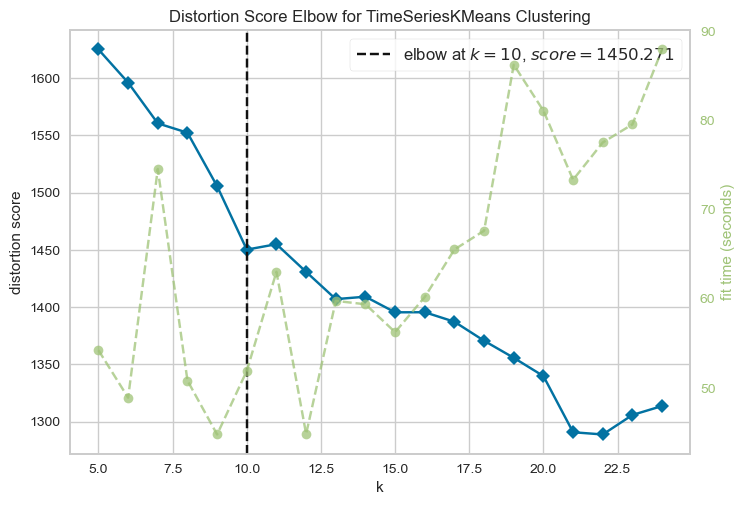

In [6]:
%time
kmeans_clustering.kelbow_visualizer(X)

#### Fit the data to cluster number as per elbow method

In [7]:
kmeans = TimeSeriesKMeans(n_clusters=10, n_jobs=-1, metric='dtw', random_state=seed)
minmax_cluster_labels = kmeans.fit_predict(X)

#### Plot ticker's timseries in clusters

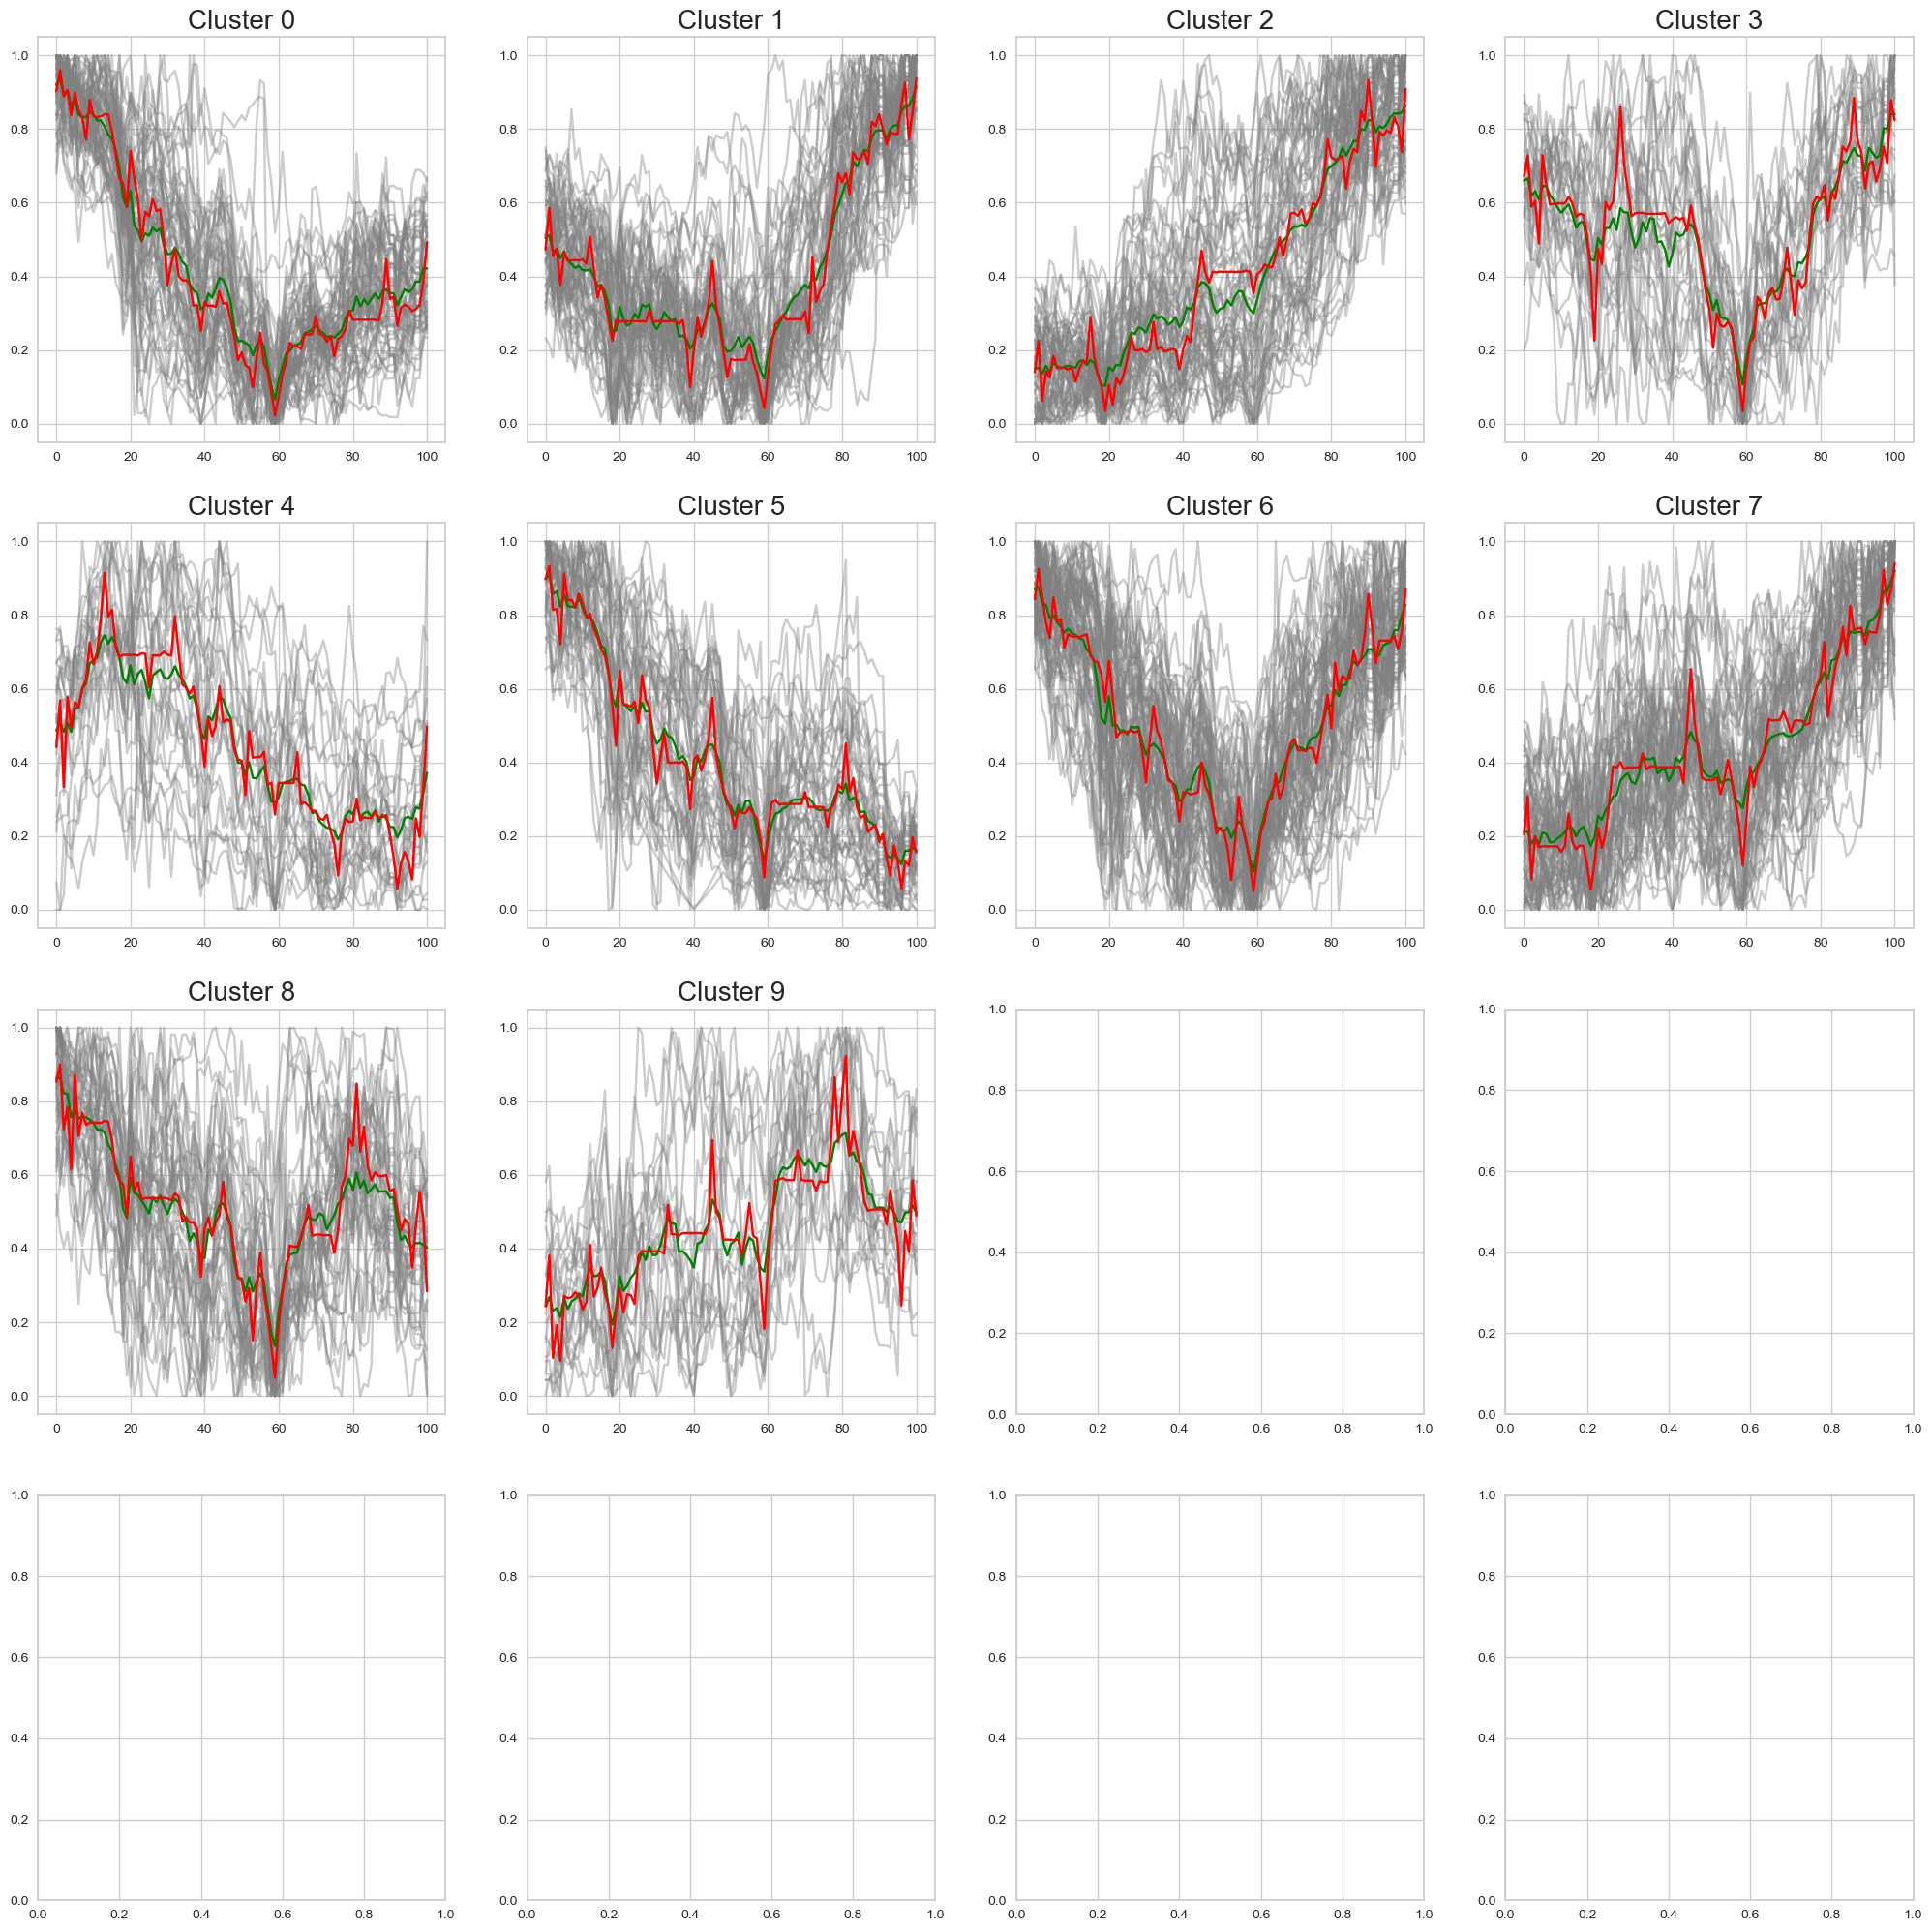

In [11]:
vis_name = 'minmax_scaling_cluster.jpeg'
kmeans_clustering.plot_clusters(minmax_scaled_df, minmax_cluster_labels, vis_name)

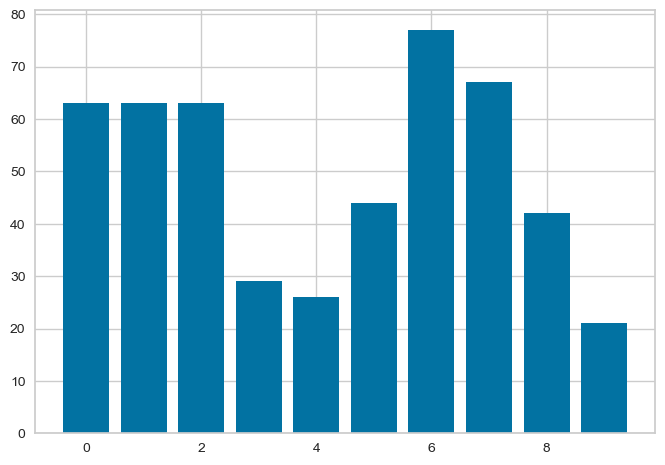

In [12]:
minmax_cluster_labels_dict = Counter(minmax_cluster_labels)
plt.bar(minmax_cluster_labels_dict.keys(), minmax_cluster_labels_dict.values())
plt.show()

### Using Standard Scaling for Scaling

In [15]:
# scale data using log returns
scaling_opt = 'standard'
standard_scaled_df = kmeans_clustering.scaling(stocks_df, scaling_opt)
X = standard_scaled_df.T

CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 116 µs


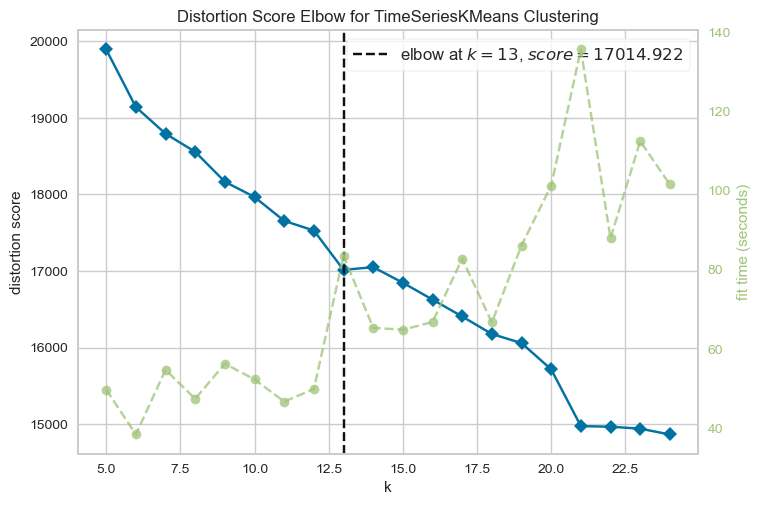

In [17]:
%time
kmeans_clustering.kelbow_visualizer(X)

In [18]:
#### Fit the data to cluster number as per elbow method
kmeans = TimeSeriesKMeans(n_clusters=13, n_jobs=-1, metric='dtw', random_state=seed)
standard_cluster_labels = kmeans.fit_predict(X)

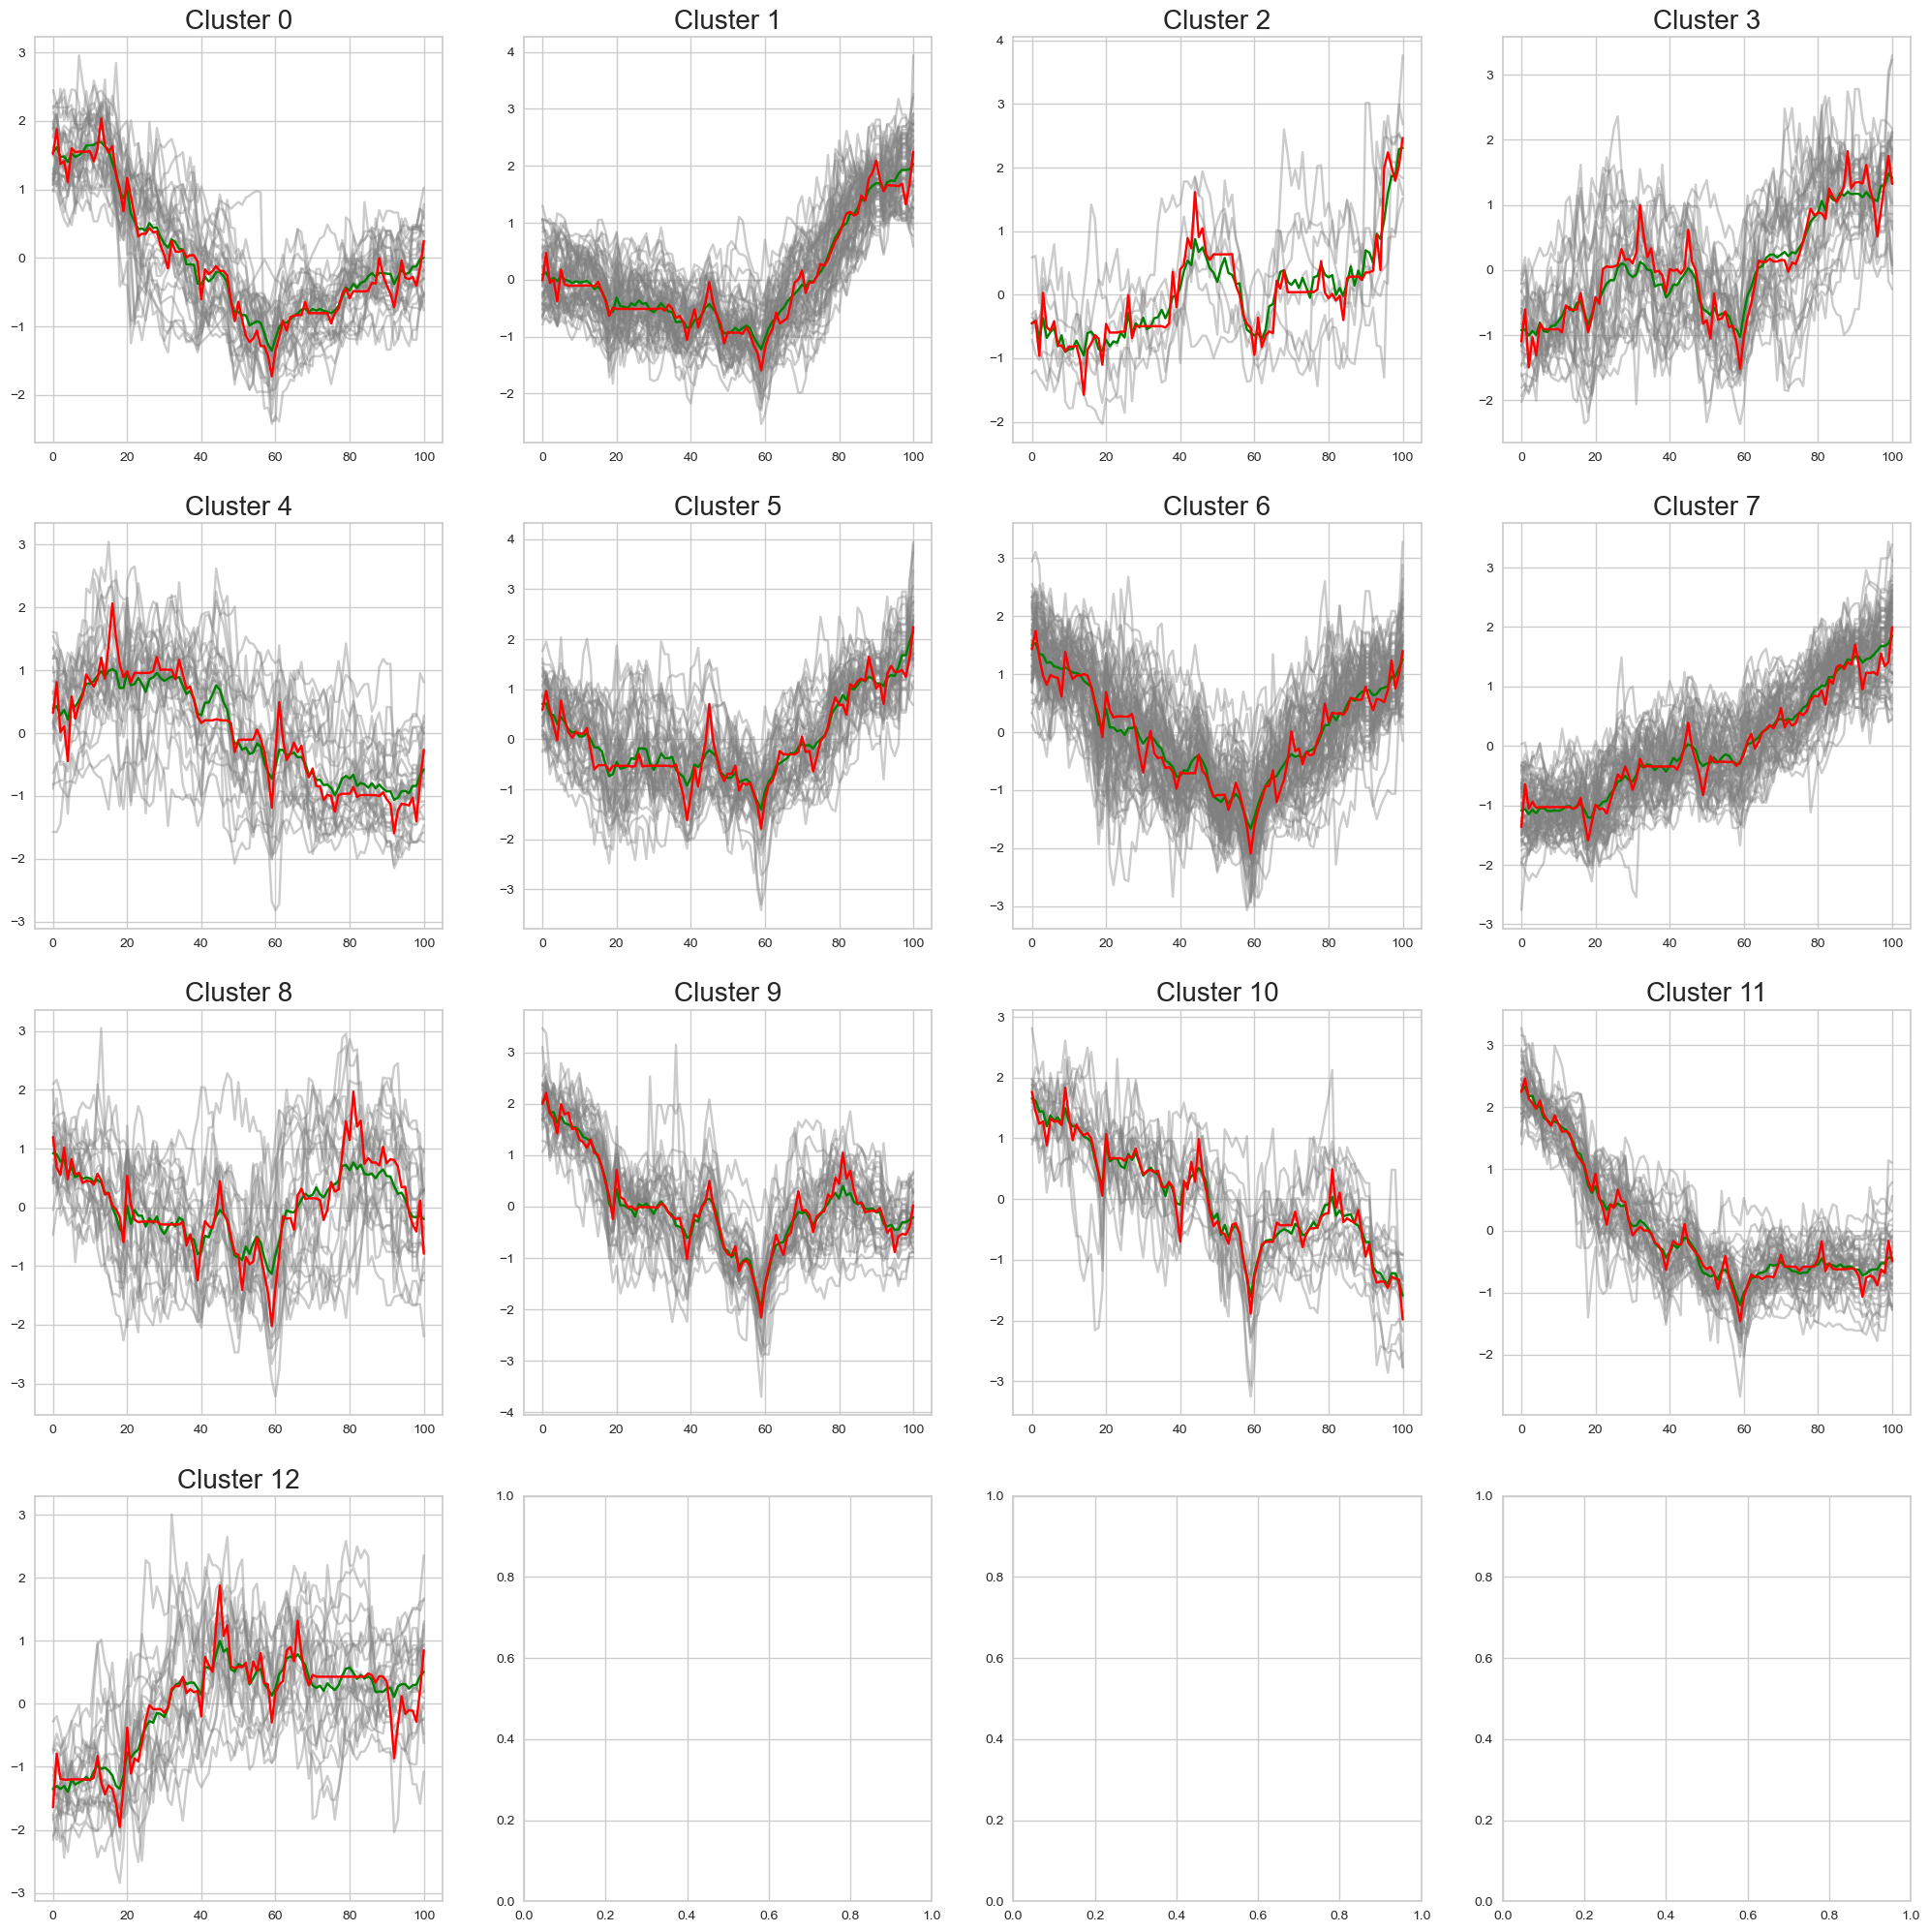

In [19]:
# plot cluster as per 
vis_name = 'standard_scaling_cluster.jpeg'
kmeans_clustering.plot_clusters(standard_scaled_df, standard_cluster_labels, vis_name)

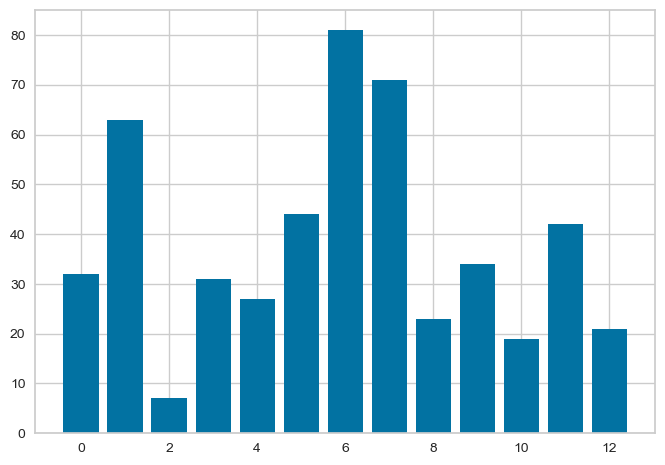

In [20]:
standard_cluster_labels_dict = Counter(standard_cluster_labels)
plt.bar(standard_cluster_labels_dict.keys(), standard_cluster_labels_dict.values())
plt.show()

### 3. Using log returns for Scaling

In [21]:
# scale data using log returns
log_scaled_df = kmeans_clustering.log_returns(stocks_df)
X = log_scaled_df.T

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


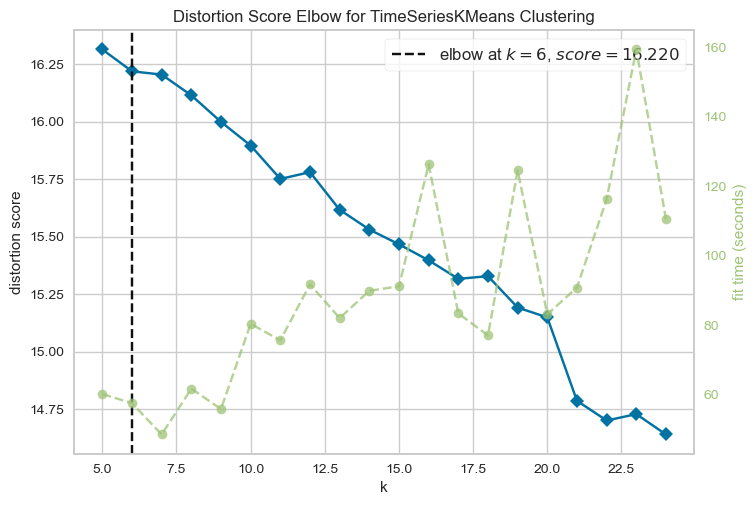

In [22]:
%time
kmeans_clustering.kelbow_visualizer(X)

In [23]:
#### Fit the data to cluster number as per elbow method
kmeans = TimeSeriesKMeans(n_clusters=6, n_jobs=-1, metric='dtw', random_state=seed)
log_cluster_labels = kmeans.fit_predict(X)

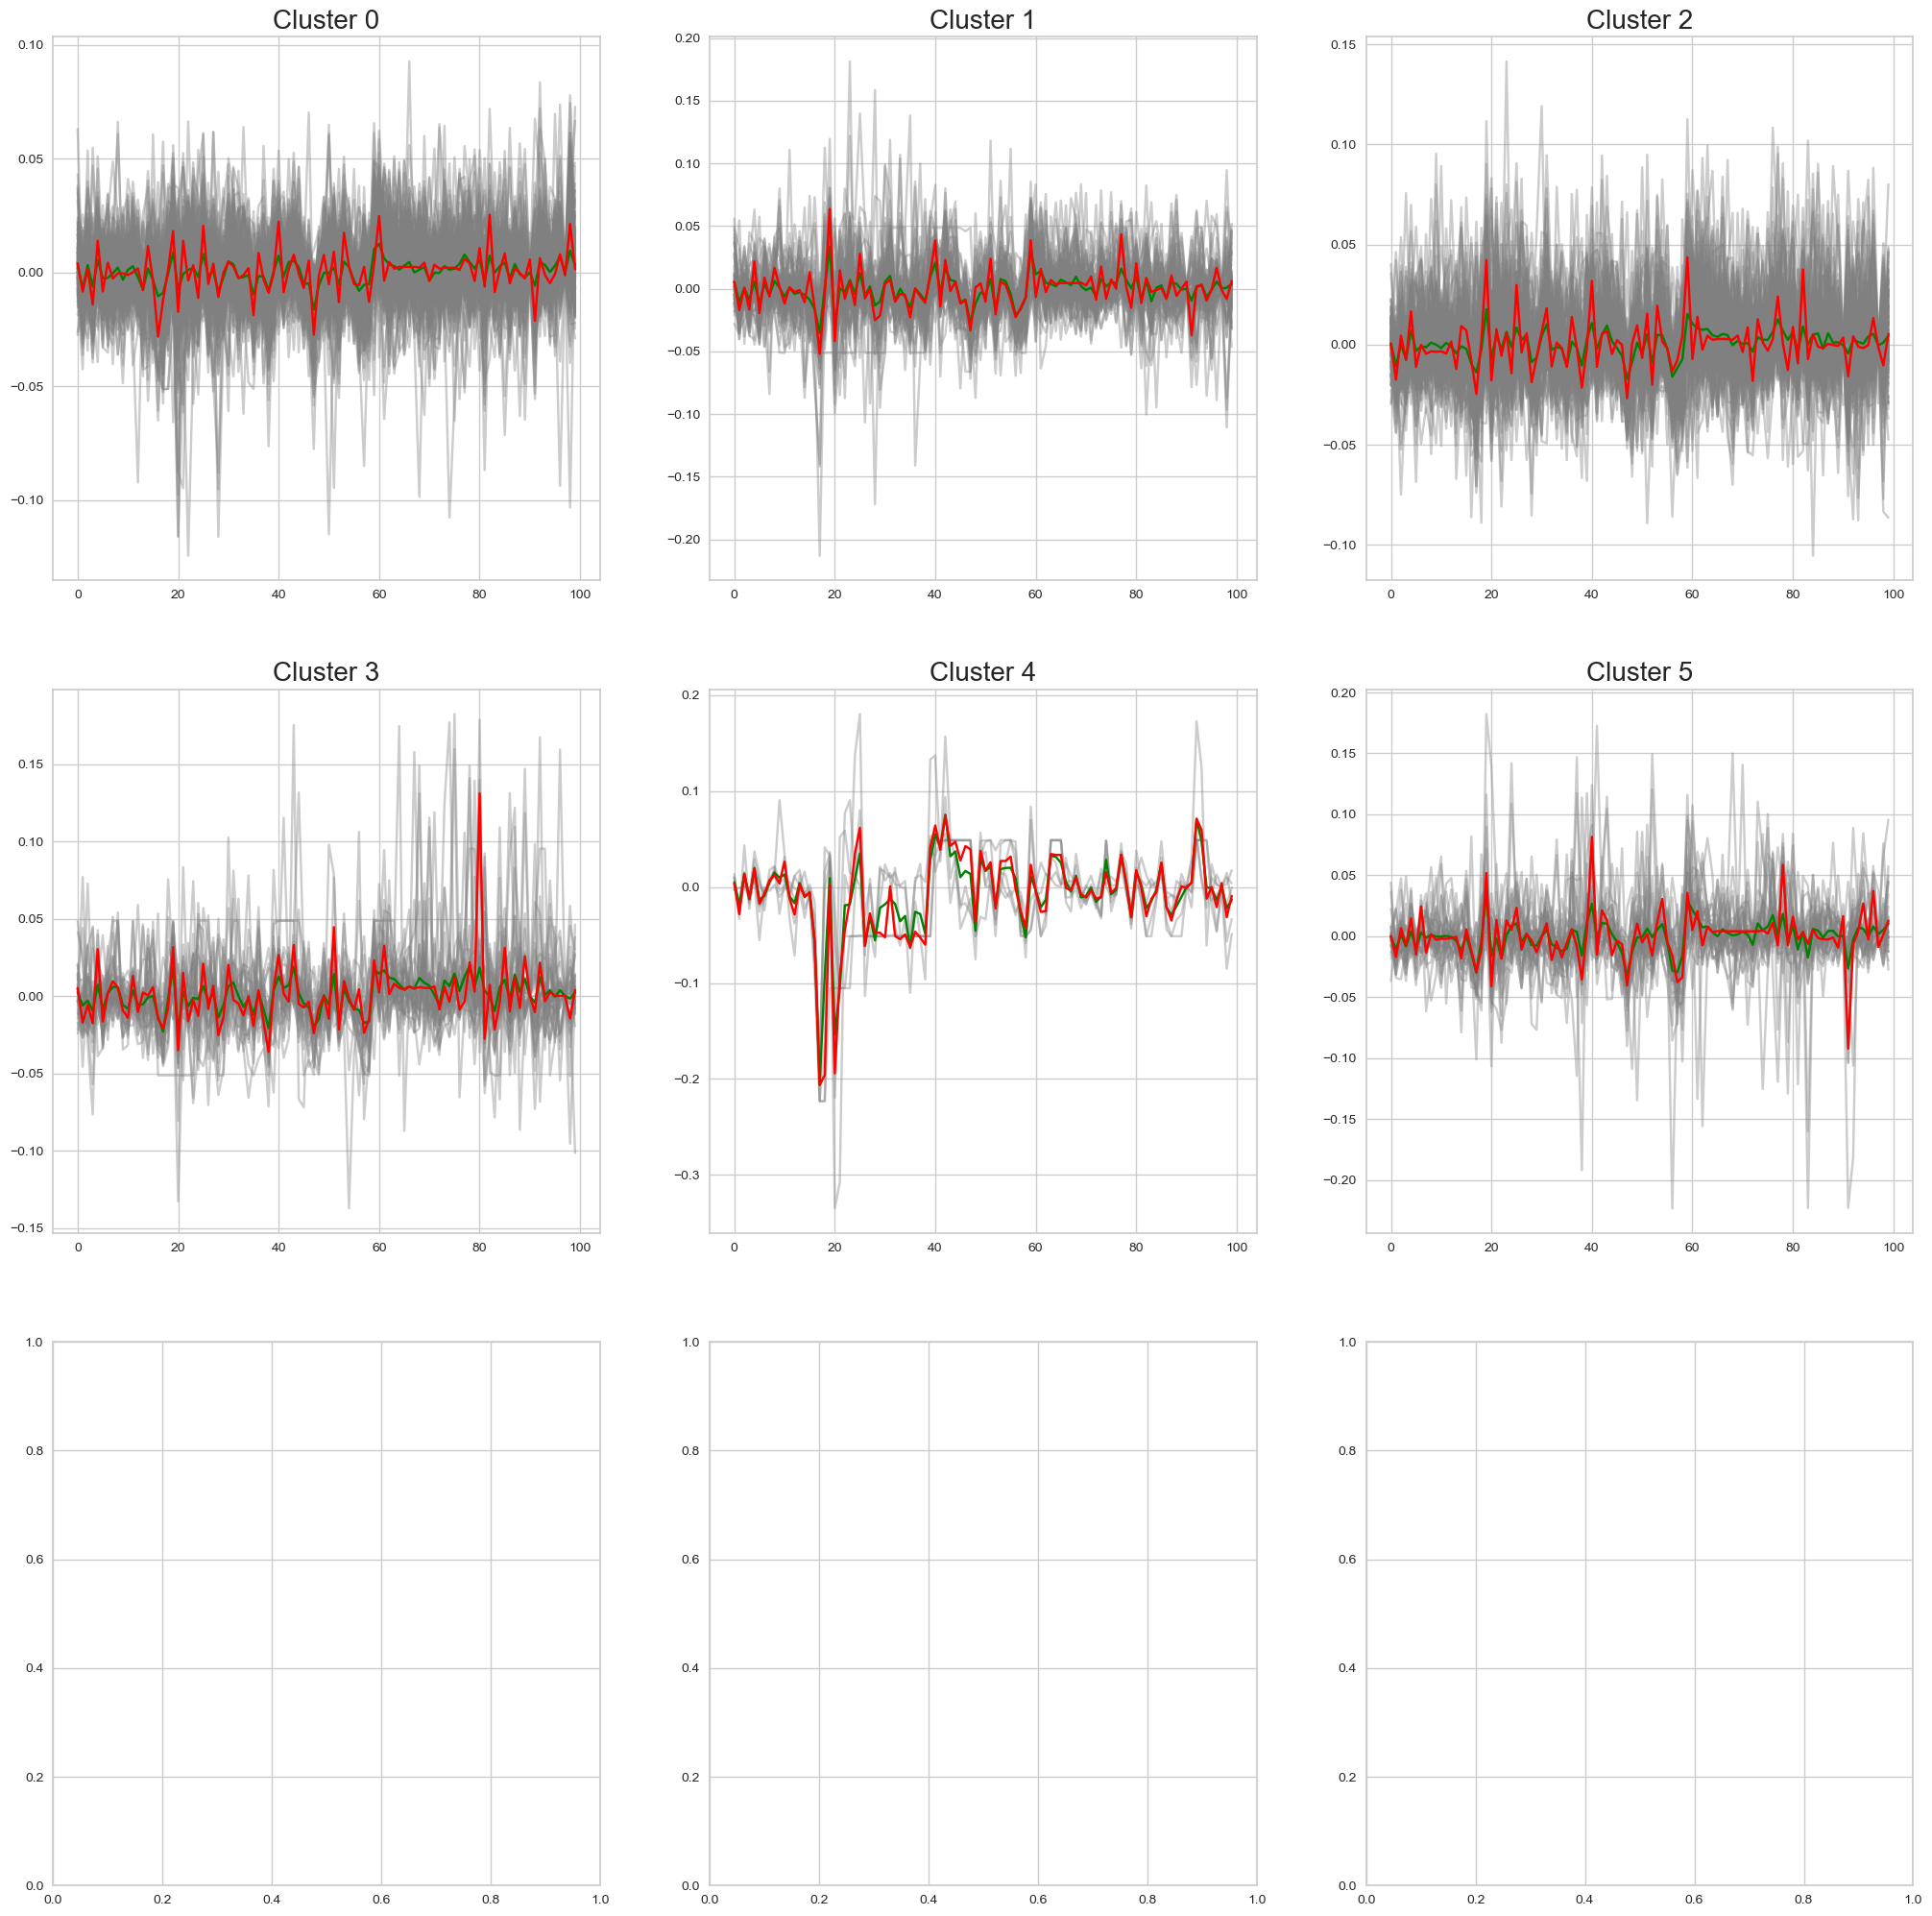

In [24]:
vis_name = 'log_returns_scaling_cluster.jpeg'
kmeans_clustering.plot_clusters(log_scaled_df, log_cluster_labels, vis_name)

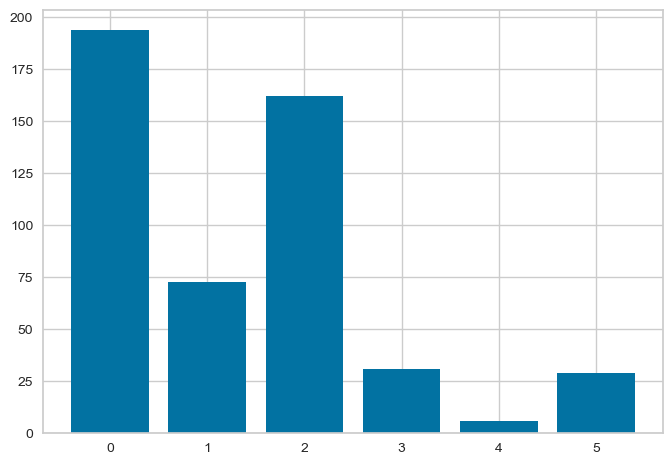

In [25]:
log_cluster_labels_dict = Counter(log_cluster_labels)
plt.bar(log_cluster_labels_dict.keys(), log_cluster_labels_dict.values())
plt.show()

### 4. Using CEEMDAN preprocessing method

In [26]:
# extract IMF features using CEEMDAN
preprocessed_dataset = kmeans_clustering.ceemdan_feature(stocks_df)
X = np.array(preprocessed_dataset)

100%|█████████████████████████████████████████████████████████████████████████████████| 495/495 [16:29<00:00,  2.00s/it]


CPU times: user 3 µs, sys: 4 µs, total: 7 µs
Wall time: 5.25 µs


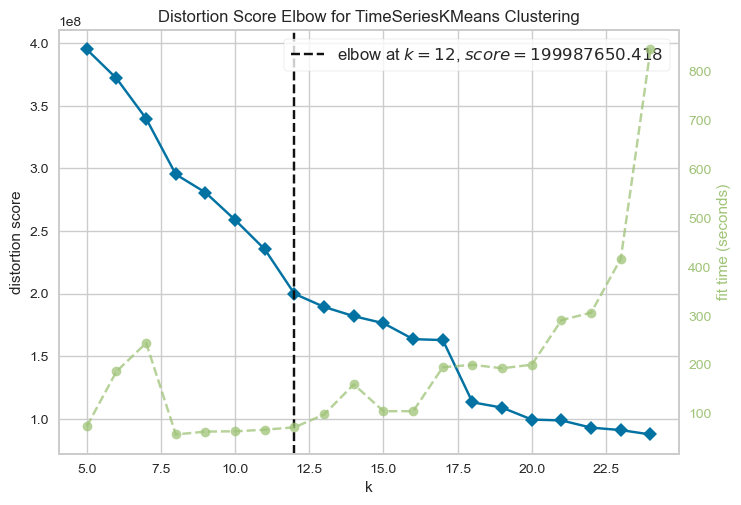

In [27]:
# use k-means to do clusterinf and visualizing the clustering 
%time
kmeans_clustering.kelbow_visualizer(X)

In [28]:
#### Fit the data to cluster number as per elbow method
kmeans = TimeSeriesKMeans(n_clusters=8, n_jobs=-1, metric='dtw', random_state=seed)
ceemdan_cluster_labels = kmeans.fit_predict(X)

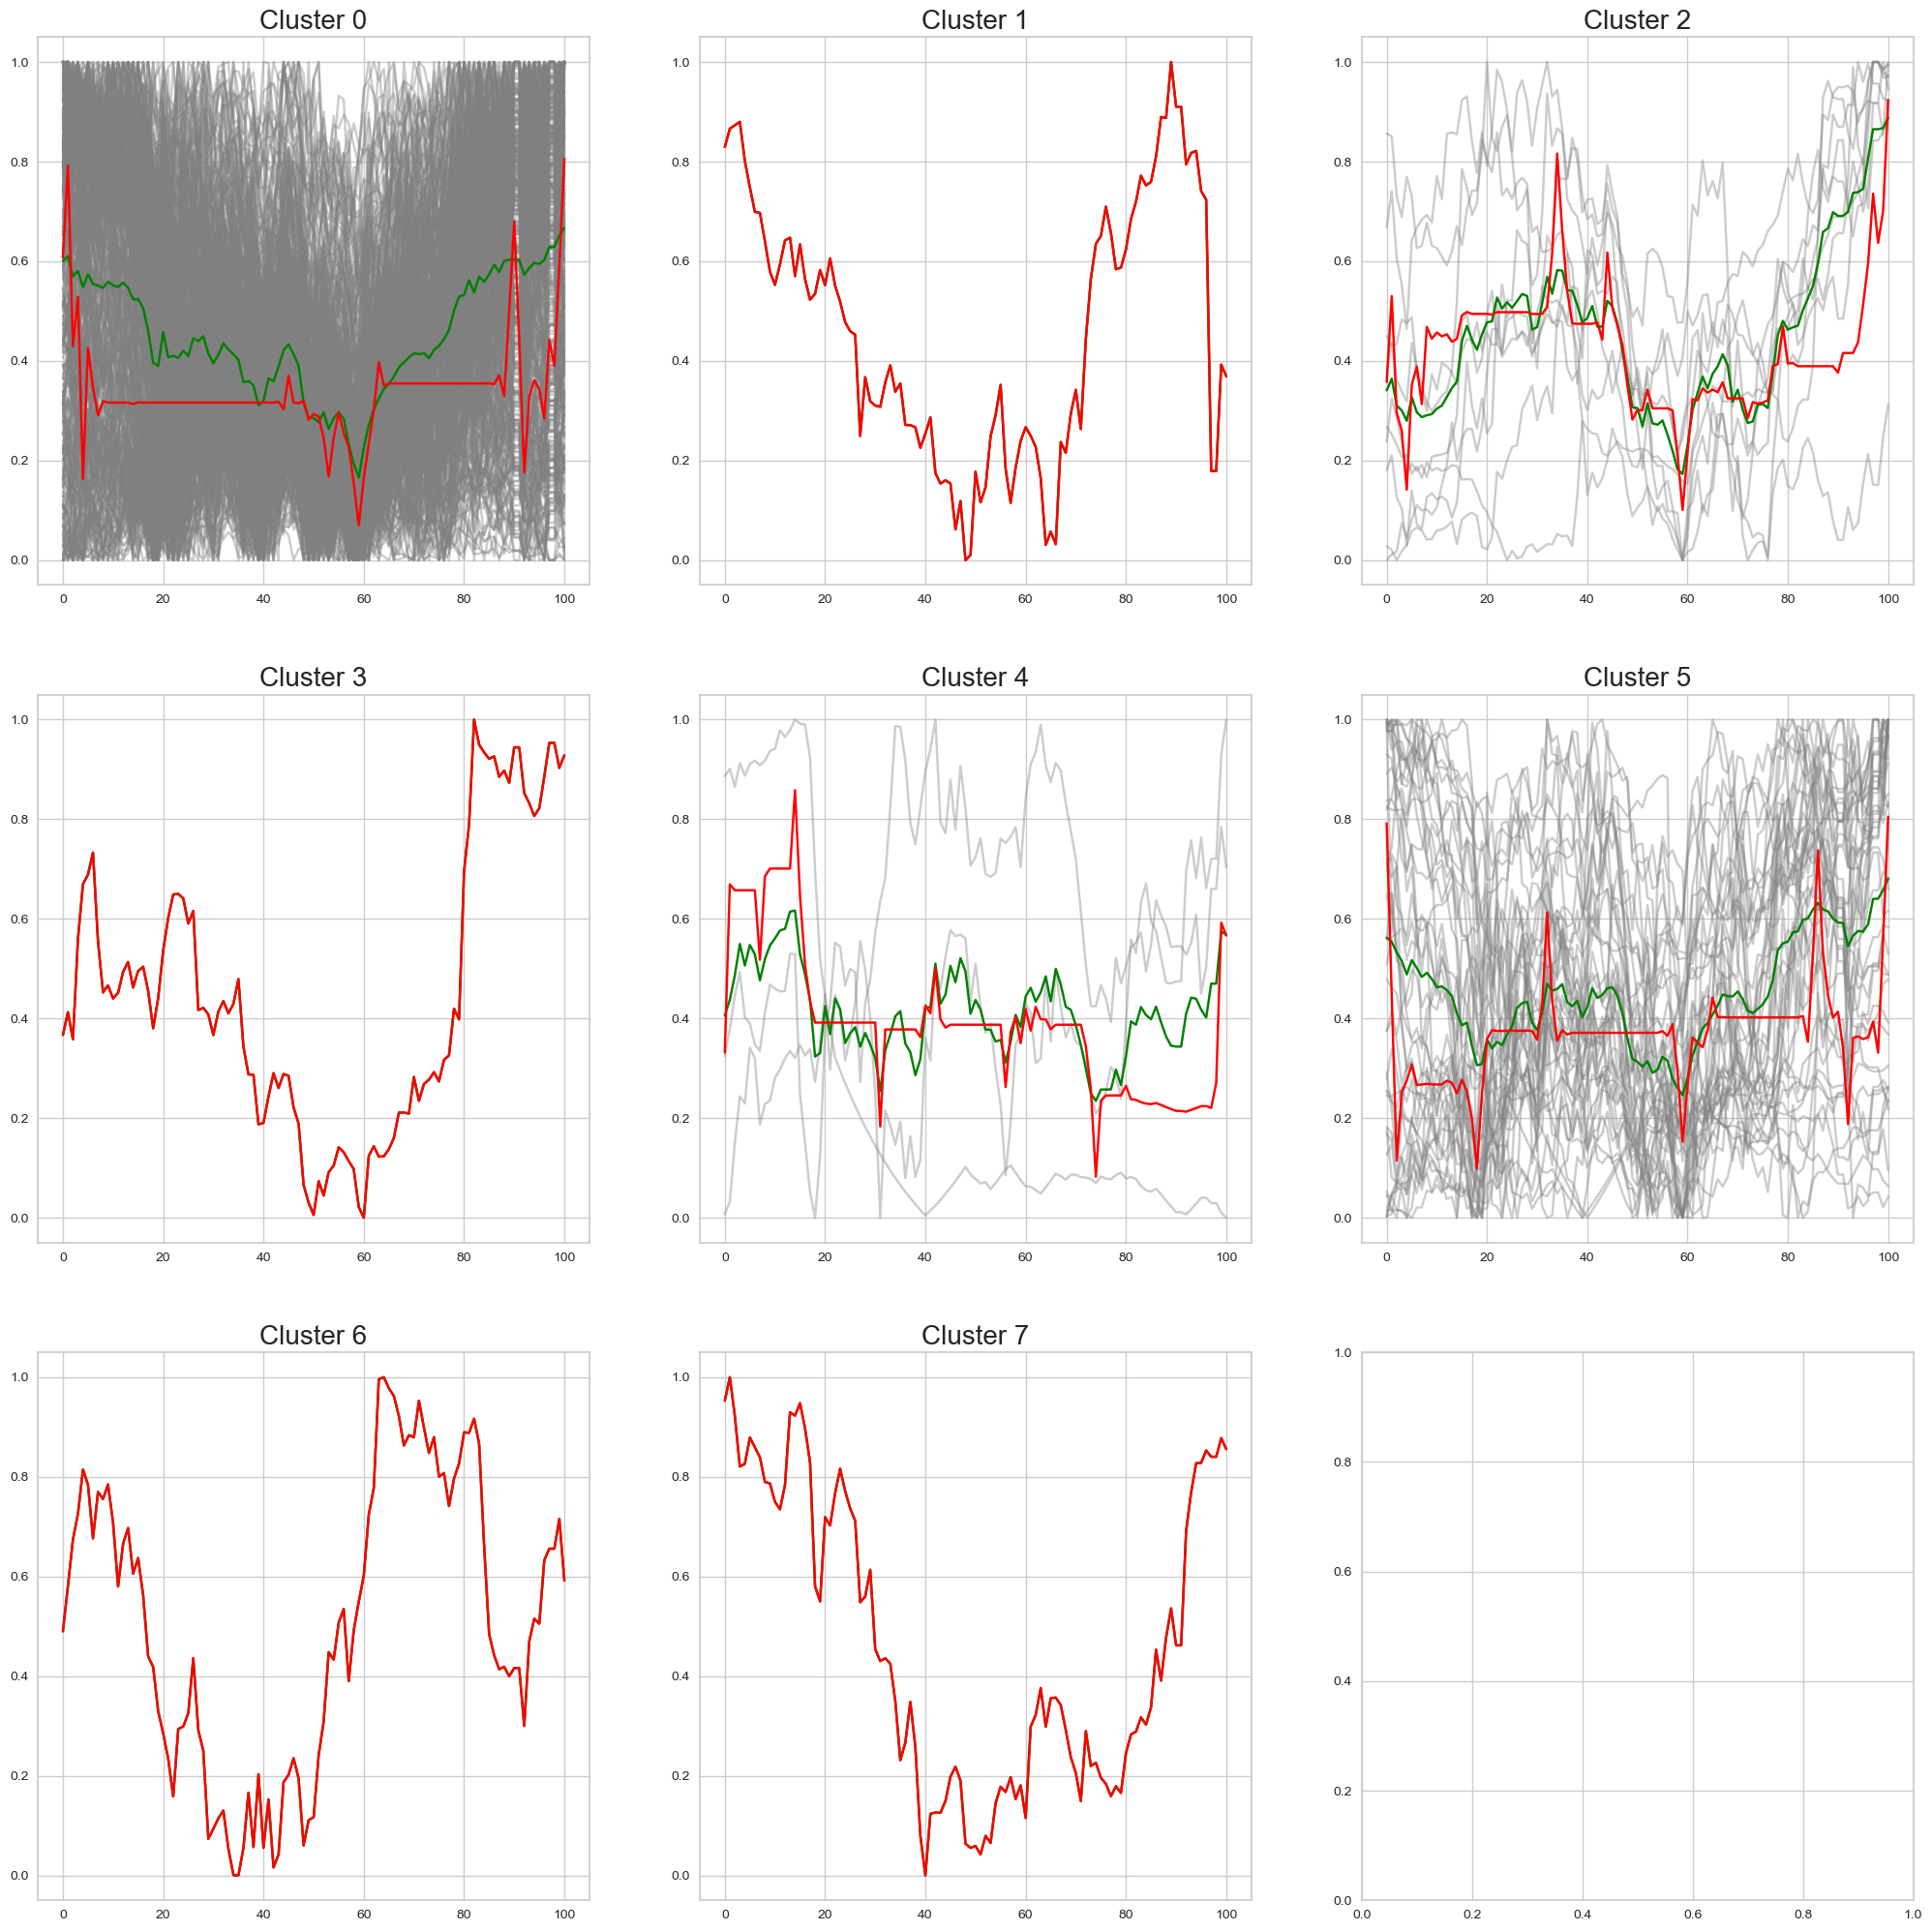

In [29]:
# plot the clusters
vis_name = 'ceemdan_imf_cluster.jpeg'
kmeans_clustering.plot_clusters(scaled_df, ceemdan_cluster_labels, vis_name)        

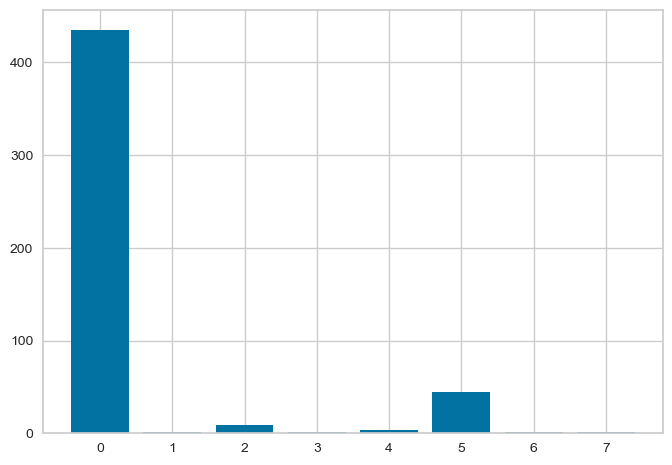

In [30]:
labels_dict = Counter(ceemdan_cluster_labels)
plt.bar(labels_dict.keys(), labels_dict.values())
plt.show()

### Observation: Clustering with StandardScaler is better than others

#### Compute dissimilarity matrix between stocks across clusters

In [31]:
# compute the dissimilarity matrix using DTW(dynamic time warping) metric
dissimilaritys_matrix = dtw.distance_matrix_fast(np.array(standard_scaled_df).T)
dissimilaritys_df = pd.DataFrame(dissimilaritys_matrix)
dissimilaritys_df.head()

0          1          2          3          4          5         6    \
0   0.000000  11.830850   9.722524   6.688391   3.531692  14.955159  7.596102   
1  11.830850   0.000000   8.773221  15.496759  14.952601   5.063283  7.038317   
2   9.722524   8.773221   0.000000   9.152712  13.214626   9.792218  4.357014   
3   6.688391  15.496759   9.152712   0.000000   6.690018  17.585285  7.586517   
4   3.531692  14.952601  13.214626   6.690018   0.000000  17.250866  8.916737   

         7          8          9    ...        485        486       487  \
0  12.964190   5.076391   4.898479  ...  10.340274   7.741409  5.320829   
1   5.369478  16.368894  14.944170  ...   8.039176  11.790835  6.597712   
2   4.068438  11.875735   8.870664  ...   3.039990   4.482017  3.599789   
3  12.513933   4.114766   4.717771  ...   8.499853   7.508056  8.954465   
4  15.664609   4.865371   6.596054  ...  11.975358  10.703037  8.447547   

         488        489        490        491        492        493        494  
0   6.826928   5.102019  14.594216  14.215041  11.834785  13.815948   7.693788  
1  14.850675  14.803974   4.928579   6.062797   6.242494   6.203059  10.199221  
2   9.087843  10.644675  10.661782  11.069894   4.023709   8.752642   5.006761  
3   4.438528   3.014239  18.036018  16.902274  12.789336  15.035189   5.886410  
4   8.202920   5.040833  16.680744  15.152865  15.813938  14.158847   8.020206  

[5 rows x 495 columns]

#### Extract Maximum Disimilarity Values

In [53]:
# extract maximum disimilarity values between ticker pairs across different clusters
max_dissim_df = kmeans_clustering.extract_max_dis_pairs(dissimilaritys_df, standard_cluster_labels)    
max_dissim_df.head(3)

row  col  max_dis_val  cluster_src  cluster_target
0  479  414    19.579770           11               7
1  414  479    19.579770            7              11
2  235  479    19.550924            7              11

In [54]:
max_dissim_df['src_cluster_ticker'] = max_dissim_df['row'].apply(lambda row: stocks_df.columns[row])
max_dissim_df['target_cluster_ticker'] = max_dissim_df['col'].apply(lambda row: stocks_df.columns[row])
max_dissim_df.head(3)

row  col  max_dis_val  cluster_src  cluster_target src_cluster_ticker  \
0  479  414    19.579770           11               7           VMART.BO   
1  414  479    19.579770            7              11      SONATSOFTW.BO   
2  235  479    19.550924            7              11             ITC.BO   

  target_cluster_ticker  
0         SONATSOFTW.BO  
1              VMART.BO  
2              VMART.BO

#### Get Stocks with Maximum Dissimilarity

In [56]:
# get stocks with maximum dissimilarity 
tickers_df = kmeans_clustering.get_max_dis_stocks(max_dissim_df, standard_cluster_labels, stocks_df)    
tickers_df = tickers_df.sort_values('cluster_source', ascending=False)
tickers_df.head(10)

ticker_indx  max_dissimilarity_distance  cluster_source         ticker
4         350.0                   18.733388            12.0        PGHL.BO
1         479.0                   19.579770            11.0       VMART.BO
3         421.0                   19.520124            10.0    SUMICHEM.BO
7           3.0                   18.036018             9.0    AARTIIND.BO
9         270.0                   17.768449             8.0  LATENTVIEW.BO
0         414.0                   19.579770             7.0  SONATSOFTW.BO
12        462.0                   16.216751             6.0  TV18BRDCST.BO
11        133.0                   16.437312             5.0     EIHOTEL.BO
2         229.0                   19.525282             4.0     IPCALAB.BO
6         427.0                   18.306342             3.0  SUPREMEIND.BO

In [57]:
tickers_list = tickers_df.ticker.values.tolist()
# exclude the two tickers - VMART.NS/LXCHEM.NS for which we do not have data for full time series
# further we select 5 tickers so as to have limited stocks for ease of experiment/efforts in model evaluation etc.
tickers_list = ['PGHL.BO', 'TV18BRDCST.BO', 'EIHOTEL.BO', 'IPCALAB.BO', 'ELGIEQUIP.BO']
print(tickers_list)

['PGHL.BO', 'TV18BRDCST.BO', 'EIHOTEL.BO', 'IPCALAB.BO', 'ELGIEQUIP.BO']


In [58]:
# ['PGHL.BO', 'TV18BRDCST.BO', 'EIHOTEL.BO', 'IPCALAB.BO', 'ELGIEQUIP.BO']

In [59]:
plot_df = stocks_df.loc[:, tickers_list].copy()
plot_df = plot_df.reset_index()
melt_df = plot_df.melt(id_vars='Date', value_name='Close Price', var_name='Ticker')
melt_df.head()

Date   Ticker  Close Price
0 2023-01-02  PGHL.BO  3968.875732
1 2023-01-03  PGHL.BO  4022.556641
2 2023-01-04  PGHL.BO  3984.871094
3 2023-01-05  PGHL.BO  3983.236816
4 2023-01-06  PGHL.BO  3975.263916

In [64]:
import plotly.express as px
fig= px.line(melt_df, x='Date', y='Close Price', color='Ticker')
fig.show()